Estaremos utilizando el archivo tp_python.csv producto de la creación y populado de tablas de la primer parte del tp.

El departamento de BBDD nos envia el CSV sin headers, y en el mail nos listan los mismos.

* TicketId: Identificador único del ticket.                         (1)
* TicketFechaApertura: Fecha de apertura del ticket.                (2)
* TicketFechaCierre: Fecha de cierre del ticket.                    (3)
* TiempoResolucionEnDias: Tiempo de resolución del ticket en días.  (4)
* EmpresaId: Identificador de la empresa asociada al ticket.        (5)
* EmpresaNombre: Nombre de la empresa asociada al ticket.           (6)
* ClienteId: Identificador del cliente asociado al ticket.          (7)
* NombreCliente: Nombre completo del cliente (nombre y apellido).   (8)
* ProblemaId: Identificador del problema asociado al ticket.        (9)
* ProblemaNombre: Nombre del problema asociado al ticket.           (10)
* TicketTipoId: Identificador del tipo de ticket.                   (11)
* TicketTipoNombre: Nombre del tipo de ticket.                      (12)
* MesCierreNumero: Número del mes en que se cerró el ticket.        (13)
* MesCierreNombre: Nombre del mes en que se cerró el ticket.        (14)
* AnioCierre: Año en el que se cerró el ticket                      (15)
* EstadoTicket: 0 Ticket Cerrado / 1 para ticket Abierto            (16)

* Primero cargamos librerías.
* Montamos el archivo desde Gdrive

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
drive.mount('/content/drive') # Montar Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



*   Creamos el DF

In [ ]:
df = np.loadtxt('/content/drive/MyDrive/Tecnicatura CD e IA/Materias/2A2C/Minearía y procesamiento de datos/TP 1° Parcial minería/TP_python.csv', delimiter=';', dtype=object, skiprows=1)

In [ ]:
# Verificamos como esta compuesto el DF deberian ser 16 columnas y 98497 filas.
print(f"Forma del DataFrame: {df.shape}")

Forma del DataFrame: (98947, 16)


Verificamos nulls.


In [ ]:
df[:, 0] = df[:, 0].astype(int)  # TicketId
df[:, 3] = df[:, 3].astype(int)  # TiempoResolucionEnDias
df[:, 4] = df[:, 4].astype(int)  # EmpresaId
df[:, 6] = df[:, 6].astype(int)  # ClienteId
df[:, 8] = df[:, 8].astype(int)  # ProblemaId
df[:, 10] = df[:, 10].astype(int)  # TicketTipoId
df[:, 12] = df[:, 12].astype(int)  # MesCierreNumero
df[:, 14] = df[:, 14].astype(int)  # AnioCierre
df[:, 15] = df[:, 15].astype(int)  # EstadoTicket

Como el forzado a INT no dio error, estamos seguros que no hay NULLs.

 Funciones de agregación
* Mínimo (empresa con menos tickets en 2023)
* Máximo (empresa con más tickets en 2023)
* Cantidad (tickets generados por cada empresa en 2022)

In [ ]:
tickets_2023 = df[df[:, 14].astype(int) == 2023] # Filtrar año 2023

* Mínimo (empresa con menos tickets en 2023)
* Máximo (empresa con más tickets en 2023) Esto tambien sería la moda.

In [ ]:
# Mínimo y máximo (empresa con menos y más tickets en 2023)
if tickets_2023.size > 0:
    empresas, counts = np.unique(tickets_2023[:, 5], return_counts=True)
    min_empresa = empresas[np.argmin(counts)]
    max_empresa = empresas[np.argmax(counts)]
    print(f"Empresa con menos tickets en 2023: {min_empresa} ({counts[np.argmin(counts)]} tickets)")
    print(f"Empresa con más tickets en 2023: {max_empresa} ({counts[np.argmax(counts)]} tickets)")
else:
    print("No hay tickets para el año 2023.")

Empresa con menos tickets en 2023: CRESUD (1 tickets)
Empresa con más tickets en 2023: NARANJA X (1551 tickets)


* Cantidad (tickets generados por cada empresa en 2022)

In [ ]:
tickets_2022 = df[df[:, 14].astype(int) == 2022] # Filtrar tickets de 2022

empresas_2022, counts_2022 = np.unique(tickets_2022[:, 5], return_counts=True) # Contar la cantidad de tickets por cada empresa

print("Cantidad de tickets generados por cada empresa en 2022:")
for empresa, count in zip(empresas_2022, counts_2022):
    print(f"{empresa}: {count} tickets")

Cantidad de tickets generados por cada empresa en 2022:
911 MP Comisaría: 64 tickets
ALSEA: 1202 tickets
Assist Card: 7 tickets
BAT: 1 tickets
BCO. COLUMBIA: 256 tickets
BCO. CREDICOOP: 23 tickets
BCO. MACRO: 469 tickets
BCO. SANTANDER: 240 tickets
Dr.Internet: 69 tickets
MAPFRE: 586 tickets
NARANJA X: 1882 tickets
NOVATIUM: 5 tickets
Nokia: 4 tickets
ORANGE: 346 tickets
Pcia NET: 75 tickets
SURCOS: 5 tickets
Shell: 976 tickets
TIMBO: 2 tickets
UNISYS: 1253 tickets


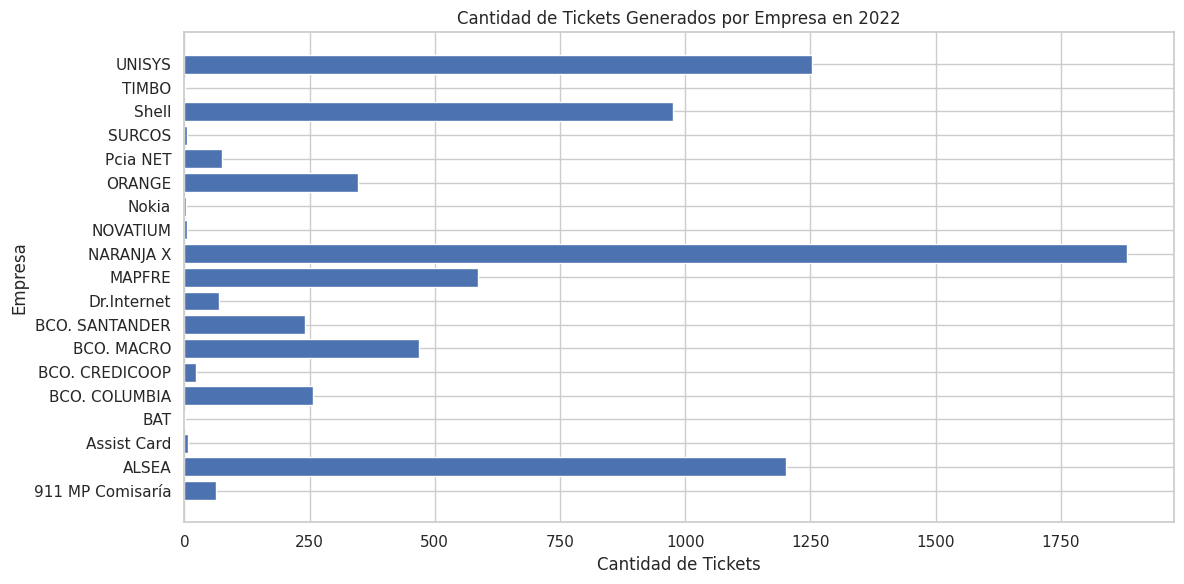

In [ ]:
# Filtrar tickets de 2022
tickets_2022 = df[df[:, 14].astype(int) == 2022]

# Contar la cantidad de tickets por cada empresa
empresas_2022, counts_2022 = np.unique(tickets_2022[:, 5], return_counts=True)

# Configurar el gráfico
plt.figure(figsize=(12, 6))
plt.barh(empresas_2022, counts_2022)
plt.title('Cantidad de Tickets Generados por Empresa en 2022')
plt.xlabel('Cantidad de Tickets')
plt.ylabel('Empresa')
plt.tight_layout()
plt.show()

Estadística descriptiva
* Moda (Obtenido en el punto de empresa con mas tickets)
* Media ((Promedio de dias de resolucion de tickets en enero 2024)
* Mediana (Mediana de tickets en 2024 por empresa)
* desvio
* rango (Dif e/ mayor y menor)
* Varianza
* Coeficiente de Variación
* Matriz de correlación y covarianza
covarianza = np.cov(X.T)
correlacion = np.corrcoef(X.T)

# **Promedio (Promedio de dias de resolucion de tickets en enero 2024)**

In [ ]:
tickets_enero_2024 = df[(df[:, 14].astype(int) == 2024) & (df[:, 12].astype(int) == 1)] # Filtrar enero de 2024

promedio_dias_resolucion_enero_2024 = np.mean(tickets_enero_2024[:, 3].astype(float)) if len(tickets_enero_2024) > 0 else 0 # Promedio de días de resolución en enero de 2024

print(f"Promedio de días de resolución de tickets en enero 2024: {promedio_dias_resolucion_enero_2024}")

Promedio de días de resolución de tickets en enero 2024: 1.5394088669950738


# **Mediana** (Mediana de tickets en 2024 por empresa)

In [ ]:
tickets_2024 = df[df[:, 14].astype(int) == 2024] # Filtrar tickets de 2024


# Extraer la columna de EmpresaId
empresas_2024 = tickets_2024[:, 4]

# Contar la cantidad de tickets por empresa
empresas_unicas, conteos = np.unique(empresas_2024, return_counts=True)

# Calcular la mediana de la cantidad de tickets por empresa
mediana_tickets_por_empresa = np.median(conteos)

print(f"La mediana de la cantidad de tickets por empresa en 2024 es: {mediana_tickets_por_empresa}")

La mediana de la cantidad de tickets por empresa en 2024 es: 74.0


# **Mostramos la distribución de los datos**

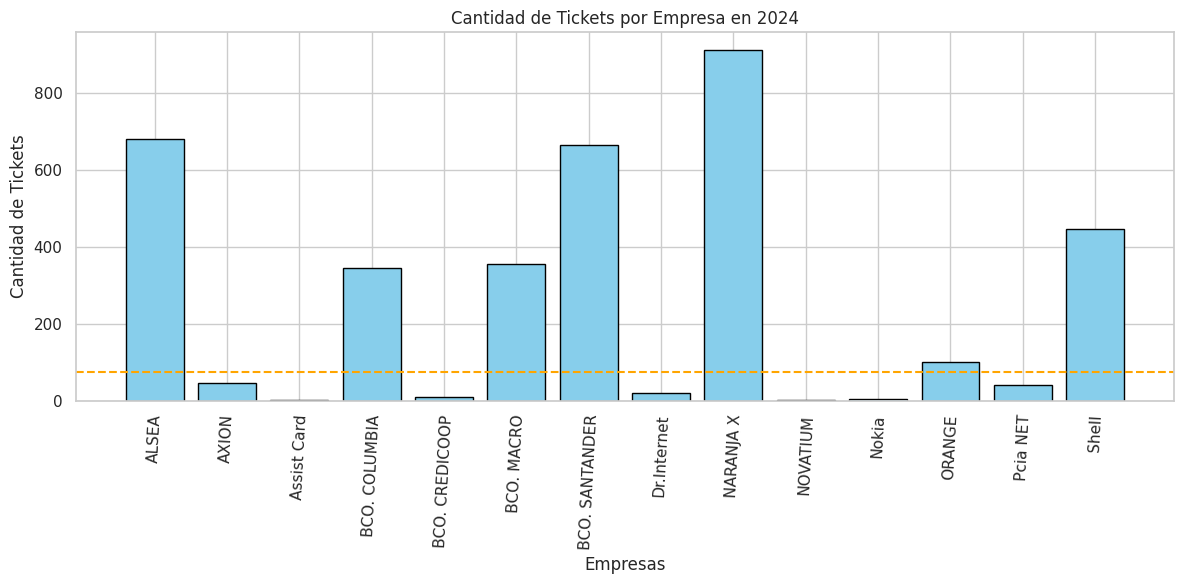

In [ ]:
# Contar la cantidad de tickets por empresa
empresas_2024, counts_2024 = np.unique(tickets_2024[:, 5], return_counts=True)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))  # Ajustar el tamaño del gráfico (ancho, alto)
plt.bar(empresas_2024, counts_2024, color='skyblue', edgecolor='black')

# Añadir línea para la mediana
plt.axhline(y=mediana_tickets_por_empresa, color='orange', linestyle='dashed', label='Mediana')

# Añadir título y etiquetas
plt.title('Cantidad de Tickets por Empresa en 2024')
plt.xlabel('Empresas')
plt.ylabel('Cantidad de Tickets')
plt.xticks(rotation=87)  # Rotar etiquetas del eje X para mejor visibilidad

# Mostrar gráfico
plt.tight_layout()  # Ajustar el gráfico para que no se superpongan las etiquetas
plt.show()

# **HAREMOS ESTADISTICA DESCRIPTIVA SOBRE NARANJA EN EL AÑO 2023**

In [ ]:
naranja_2023 = tickets_2023[tickets_2023[:, 5] == 'NARANJA X'] # Filtrar tickets de Naranja X en 2023

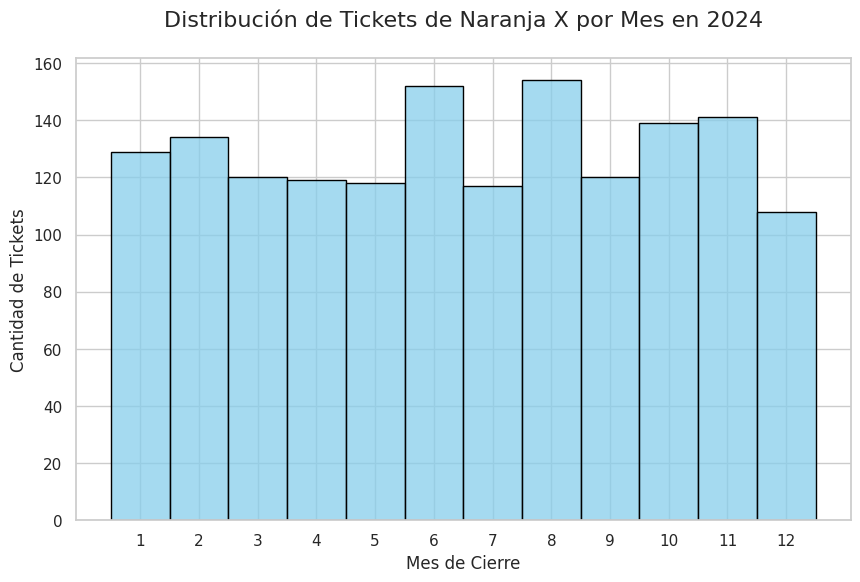

In [ ]:
# Extraer las columnas relevantes
data_anno = tickets_2023[:, 14].astype(int)  # Columna 15: Año de cierre
data_empresa = tickets_2023[:, 5]  # Columna 6: Nombre de la empresa
data_mes = tickets_2023[:, 12].astype(int)  # Columna 13: Número de mes de cierre

# Crear las máscaras para filtrar los datos
mask_2023 = data_anno == 2023  # Filtrar por el año 2023
mask_naranja_x = data_empresa == 'NARANJA X'  # Filtrar por empresa "Naranja X"

# Aplicar las máscaras para filtrar los tickets de "Naranja X" en 2023
mask_naranja_x_2023 = np.logical_and(mask_2023, mask_naranja_x)
tickets_naranja_x_2023 = tickets_2023[mask_naranja_x_2023]

# Extraer los números de los meses de cierre de los tickets filtrados
meses_cierre_naranja_2023 = tickets_naranja_x_2023[:, 12].astype(np.int_)

# Crear el gráfico de distribución de la cantidad de tickets por mes
sns.set(rc={"figure.figsize": (10, 6)})  # Ajustar tamaño del gráfico
sns.set_style("whitegrid")
dist = sns.histplot(meses_cierre_naranja_2023, stat='count', kde=False,
                    bins=np.arange(1, 14)-0.5,  # Ajustar las barras para los 12 meses
                    color="skyblue", edgecolor="black")

# Añadir título y etiquetas
dist.set_title('Distribución de Tickets de Naranja X por Mes en 2024\n', fontsize=16)
dist.set_xlabel('Mes de Cierre')  # Etiqueta del eje X
dist.set_ylabel('Cantidad de Tickets')  # Etiqueta del eje Y
dist.set_xticks(np.arange(1, 13))  # Asegurar que los ticks del eje X vayan de 1 a 12 (meses)

# Mostrar el gráfico
plt.show()

In [ ]:
meses_cierre = naranja_2023[:, 12].astype(int) # Extraer el mes de cierre de los tickets (columna 12)

conteo_tickets_por_mes = np.bincount(meses_cierre, minlength=13)[1:] # Contar la cantidad de tickets por mes

rango_tickets = np.max(conteo_tickets_por_mes) - np.min(conteo_tickets_por_mes) # Calcular rango

desvio_tickets = np.std(conteo_tickets_por_mes) # Calcular desvío estándar

varianza_tickets = np.var(conteo_tickets_por_mes) # Calcular varianza

media_tickets = np.mean(conteo_tickets_por_mes) # Calcular media

coeficiente_variacion = (desvio_tickets / media_tickets) * 100 if media_tickets != 0 else 0 # Calcular coeficiente de variación

# Imprimir resultados
print(f"Rango de tickets para NARANJA X en 2023: {rango_tickets}, esto muestra la diferencia entre el mes con más y menos tickets.")
print(f"Desvío estándar de tickets para NARANJA X en 2023: {desvio_tickets:.2f}, es la cantidad de tickets alejados respecto de la media.")
print(f"Varianza de tickets para NARANJA X en 2023: {varianza_tickets:.2f}, lo de recién al cuadrado.")
print(f"Media de tickets para NARANJA X en 2023: {media_tickets:.2f}.")
print(f"Coeficiente de variación de tickets para NARANJA X en 2023: {coeficiente_variacion:.2f}%.")

Rango de tickets para NARANJA X en 2023: 46, esto muestra la diferencia entre el mes con más y menos tickets.
Desvío estándar de tickets para NARANJA X en 2023: 14.11, es la cantidad de tickets alejados respecto de la media.
Varianza de tickets para NARANJA X en 2023: 199.19, lo de recién al cuadrado.
Media de tickets para NARANJA X en 2023: 129.25.
Coeficiente de variación de tickets para NARANJA X en 2023: 10.92%.


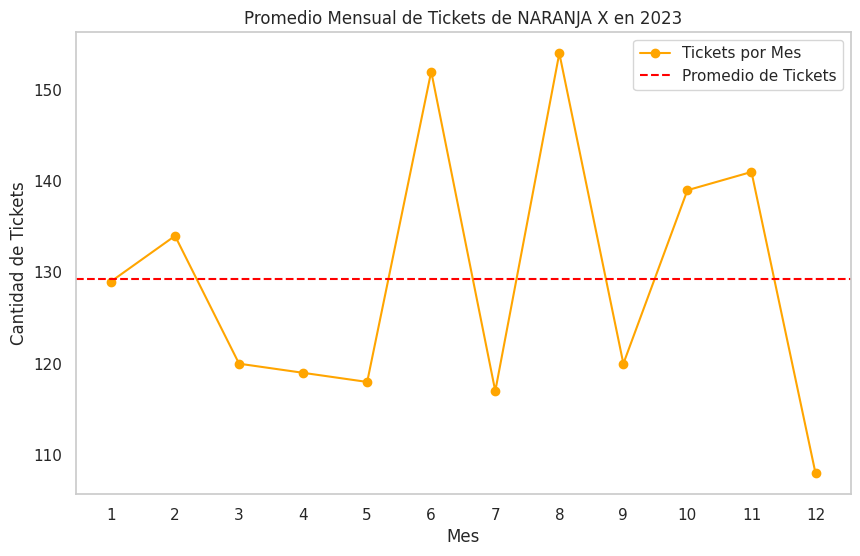

In [ ]:
# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), conteo_tickets_por_mes, marker='o', linestyle='-', color='orange', label='Tickets por Mes')
plt.axhline(y=media_tickets, color='red', linestyle='--', label='Promedio de Tickets')
plt.title('Promedio Mensual de Tickets de NARANJA X en 2023')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Tickets')
plt.xticks(range(1, 13))  # Etiquetas para cada mes
plt.legend()
plt.grid()
plt.show()

SE TIENE LA IDEA DE VER SI HAY ALGUNA RELACION ENTRE LAS DISTINTAS VARIABLES A FIN DE PODER MEJORAR LA ATENCION Y REDUCIR LA CANTIDAD DE DÍAS.

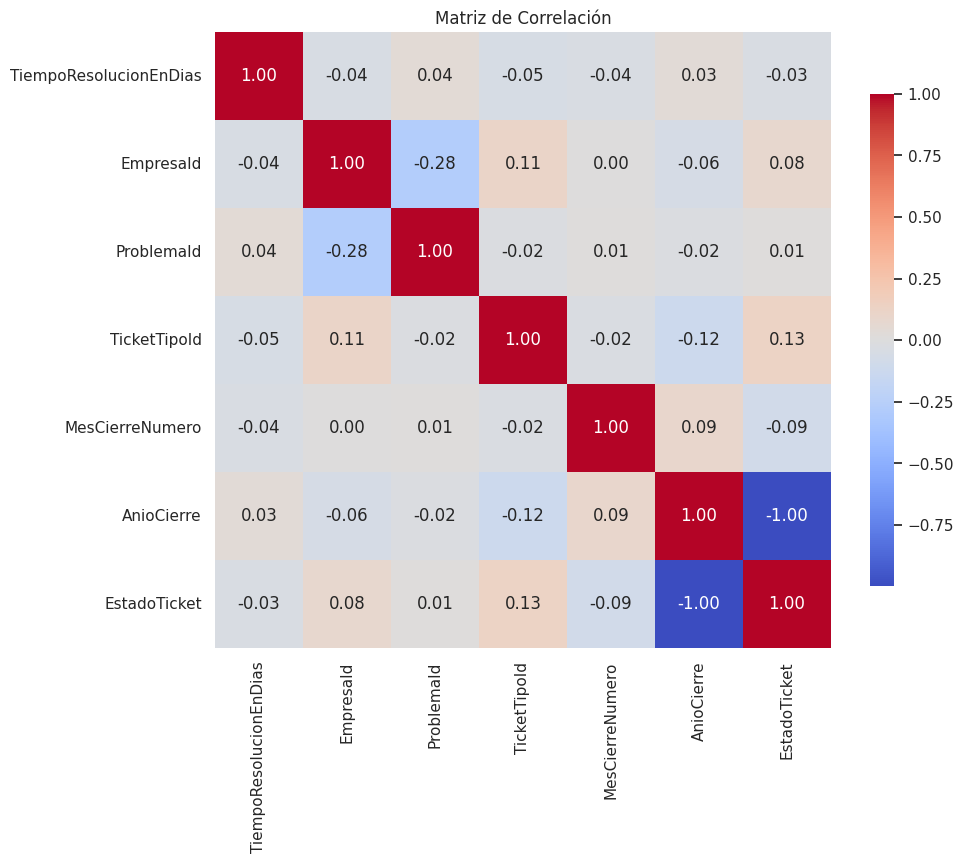

In [ ]:
column_names = [
    "TicketId", "TicketFechaApertura", "TicketFechaCierre",
    "TiempoResolucionEnDias", "EmpresaId", "EmpresaNombre",
    "ClienteId", "NombreCliente", "ProblemaId", "ProblemaNombre",
    "TicketTipoId", "TicketTipoNombre", "MesCierreNumero",
    "MesCierreNombre", "AnioCierre", "EstadoTicket"
]

df = pd.DataFrame(df, columns=column_names)

# Forzamos las columnas a int
df["TiempoResolucionEnDias"] = df["TiempoResolucionEnDias"].astype(int)
df["EmpresaId"] = df["EmpresaId"].astype(int)
df["ProblemaId"] = df["ProblemaId"].astype(int)
df["TicketTipoId"] = df["TicketTipoId"].astype(int)
df["MesCierreNumero"] = df["MesCierreNumero"].astype(int)
df["AnioCierre"] = df["AnioCierre"].astype(int)
df["EstadoTicket"] = df["EstadoTicket"].astype(int)

# Seleccionamos las columnas relevantes para la matriz de correlación
numerical_cols = [
    "TiempoResolucionEnDias", "EmpresaId", "ProblemaId",
    "TicketTipoId", "MesCierreNumero", "AnioCierre", "EstadoTicket"
]

# Creamos la matriz de correlación
correlation_matrix = df[numerical_cols].corr()

# Configuramos el tamaño de la figura
plt.figure(figsize=(10, 8))

# Creamos el heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Configuramos el título y mostramos el gráfico
plt.title('Matriz de Correlación')
plt.show()


Como se puede apreciar, de las variables propuestas y estudiadas, no hay nada que indique una relacion para poder analizar y reducir la cantidad de dias de atención, se sugiere ampliar la BD (obtener regiones o provincias) a fin de ampliar el estudio y verificar nuevamente.

No obstante, se nota una relación entre "empresa" y "problema" pero entendemos que esto se debe a que los problemas de cada empresa ya estan acotados, por lo que se ve afectado simplemente por el volumen de incidencias del cliente.